# Data Preparation 

In [1]:
pip install yfinance # install yahoo finance library

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import the libraries
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

In [3]:
def stock_data(tickers, years):
    data = pd.DataFrame()
    stocks = list()
    # Calculate the end date (today's date)
    end_date = datetime.today()
    for i in tickers:
        # Calculate the start date by subtracting years from the end date
        start_date = end_date - timedelta(days=years * 365)
        # Download historical data for the specified ticker and date range
        historical_data = yf.download(i, start=start_date, end=end_date)
        # Concatenate the adjusted closing prices to the dataframe
        data = pd.concat([data, pd.DataFrame(historical_data['Adj Close'])], axis=1)
        stocks.append(i)
    # Rename columns with ticker names
    data.columns = stocks
    return data

ticks = ["BTC-USD","AVAX-USD"] 
years = 2

stock_df = stock_data(ticks,years)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
#Check the last few rows of data
column_names=['BTC','AVAX']
stock_df.columns=column_names
stock_df.tail(10)

,BTC,AVAX
Date,,
2024-05-25,69265.945312,38.287785
2024-05-26,68518.093750,36.752045
2024-05-27,69394.554688,38.234318
2024-05-28,68296.218750,36.995396
2024-05-29,67578.093750,36.136925
2024-05-30,68364.992188,35.987576
2024-05-31,67491.414062,36.055862
2024-06-01,67706.937500,35.760113
2024-06-02,67751.601562,34.932491


In [5]:
#check the data types of each variables
stock_df.dtypes

BTC     float64
AVAX    float64
dtype: object

# Data cleaning

In [6]:
#check for the missing values.
stock_df[['BTC','AVAX']].isnull().values.any()

False

No missing values found here.

In [7]:
#check for negative values or 0
stock_df['BTC'][stock_df.BTC<=0]

Series([], Name: BTC, dtype: float64)

In [8]:
stock_df['AVAX'][stock_df.AVAX<=0]

Series([], Name: AVAX, dtype: float64)

<Figure size 576x432 with 0 Axes>

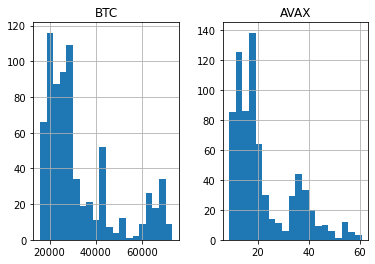

In [9]:
#check for outliers
plt.figure(figsize=(8,6))
stock_df.hist(bins=20)
plt.show()

# Statistical Analysis

In [10]:
#Calculate the pairwise correlation coefficients.
cc = stock_df.corr()
cc

,BTC,AVAX
BTC,1.000000,0.835853
AVAX,0.835853,1.000000


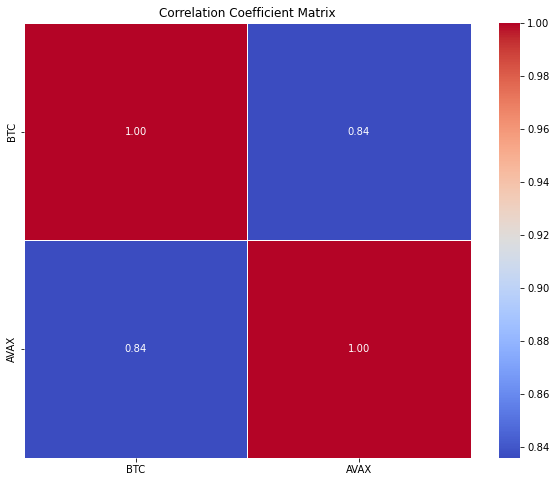

In [11]:
# Visualize in heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cc, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Matrix')
plt.show()

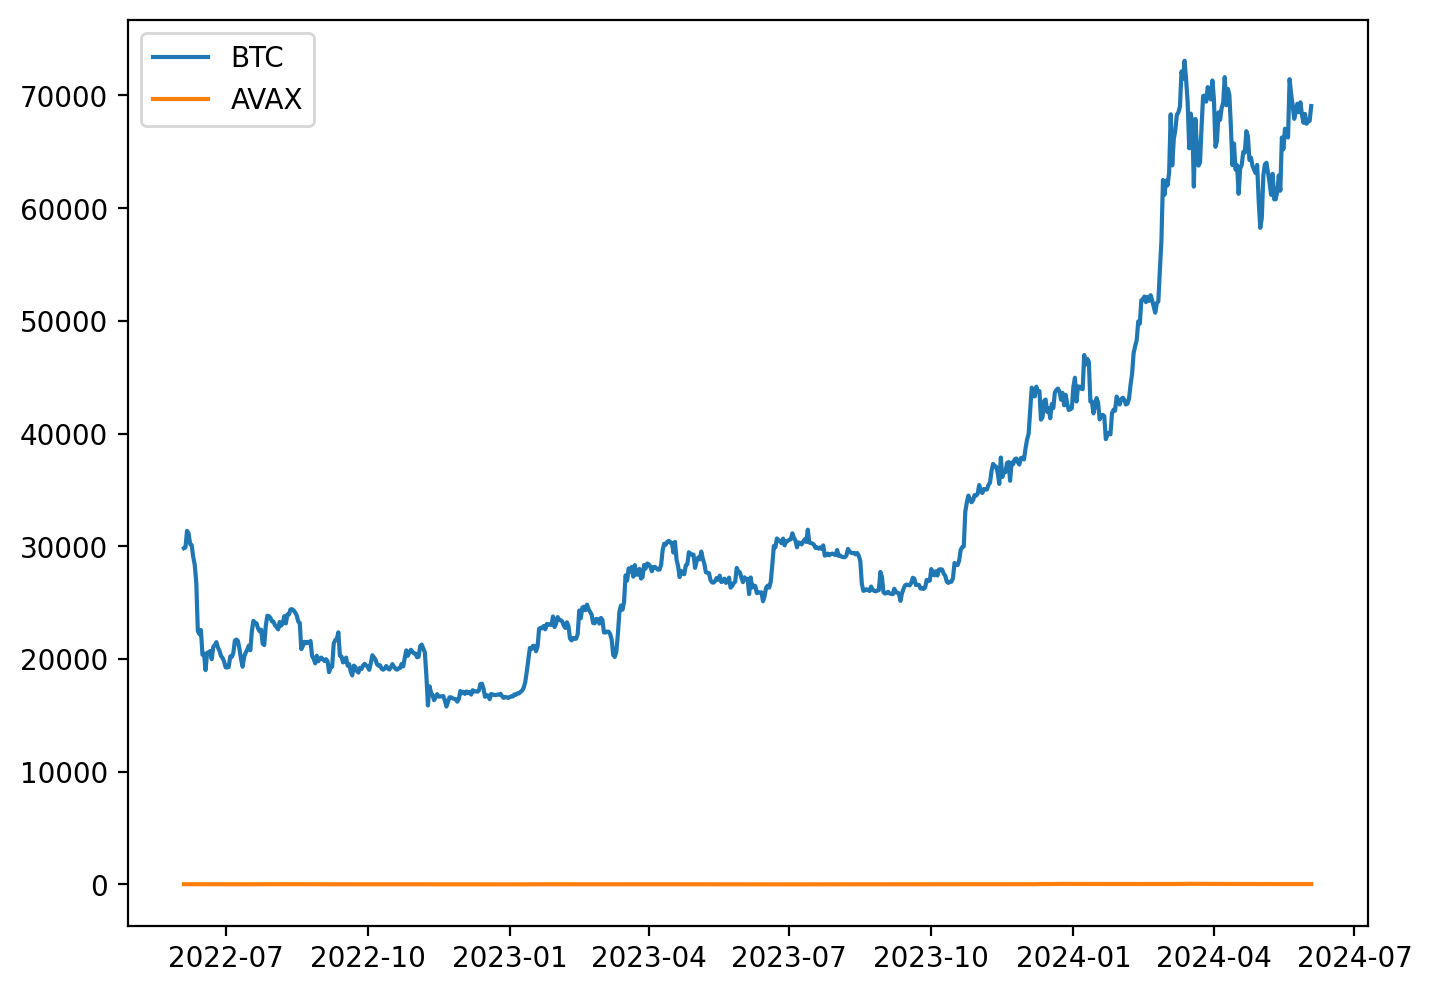

In [12]:
import matplotlib.pyplot as plt

# Visualize the trend in line chart.

plt.figure(figsize=(8, 6), dpi=200)  # Define the figure size and dpi
BTC = stock_df['BTC'] 
AVAX = stock_df['AVAX'] 
plt.plot(BTC, label="BTC")
plt.plot(AVAX, label="AVAX")
plt.legend()
plt.show()  # Show the plot


Here the range is different, So tried to show the trend in the same graph.

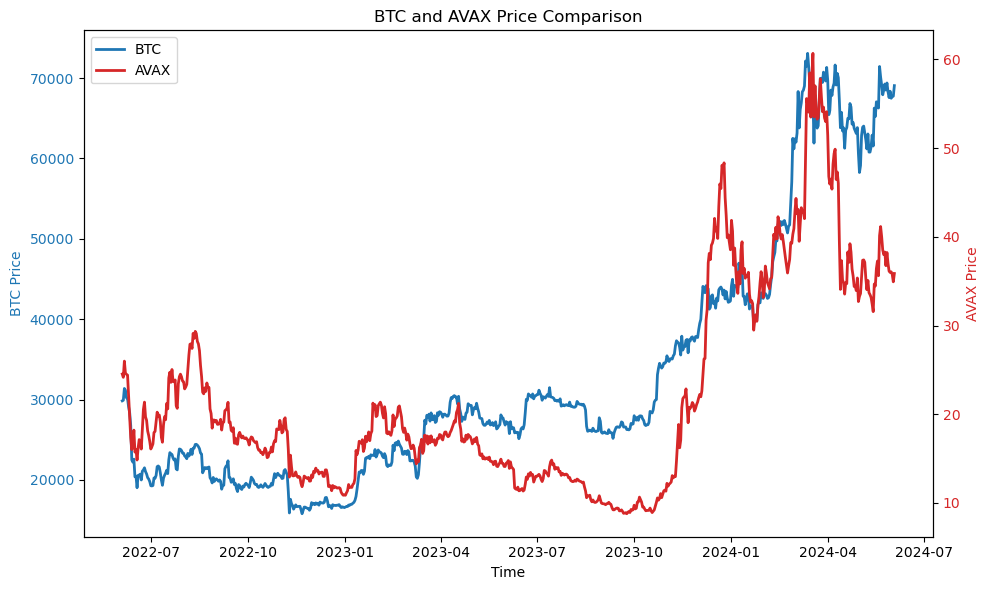

In [13]:
import matplotlib.pyplot as plt

# Assuming stock_df is your DataFrame containing the data for 'BTC' and 'AVAX'
BTC = stock_df['BTC'] 
AVAX = stock_df['AVAX'] 

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)

# Plot the first time series (BTC) on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('BTC Price', color=color)
ax1.plot(BTC, color=color, linestyle='-', linewidth=2, label='BTC')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the second time series (AVAX)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVAX Price', color=color)
ax2.plot(AVAX, color=color, linewidth=2, label='AVAX')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
plt.title('BTC and AVAX Price Comparison')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

# Augmented Dickey-Fuller (ADF) Test

In [14]:
from statsmodels.tsa.stattools import adfuller

columns_to_test = ['BTC', 'AVAX']  # List of columns to test

# Iterate over each column and perform ADF test
for column in columns_to_test:
    data = stock_df[column]
    result = adfuller(data)
    
    # Extracting results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Printing results
    print(f"Results for {column}:")
    print("ADF Statistic:", adf_statistic)
    print("p-value:", p_value)
    print("Critical Values:", critical_values)
    print("------------------------------------")

Results for BTC:
ADF Statistic: 0.6765503622065656
p-value: 0.989358083910644
Critical Values: {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}
------------------------------------
Results for AVAX:
ADF Statistic: -1.4937594351758479
p-value: 0.536596167250019
Critical Values: {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}
------------------------------------


# Hurst Exponent

In [15]:
pip install hurst

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from hurst import compute_Hc

columns_to_test = ['BTC','AVAX']  # List of columns to test

# Iterate over each column and calculate Hurst Exponent
for column in columns_to_test:
    data = stock_df[column]
    
    # Convert the data to numpy array
    data_array = np.array(data)
    
    # Calculate Hurst Exponent
    H, c, data_rescaled = compute_Hc(data_array, kind='price', simplified=True)
    
    # Printing results
    print(f"Hurst Exponent for {column}: {H}")

Hurst Exponent for BTC: 0.7517202514800687
Hurst Exponent for AVAX: 0.7446556201751829


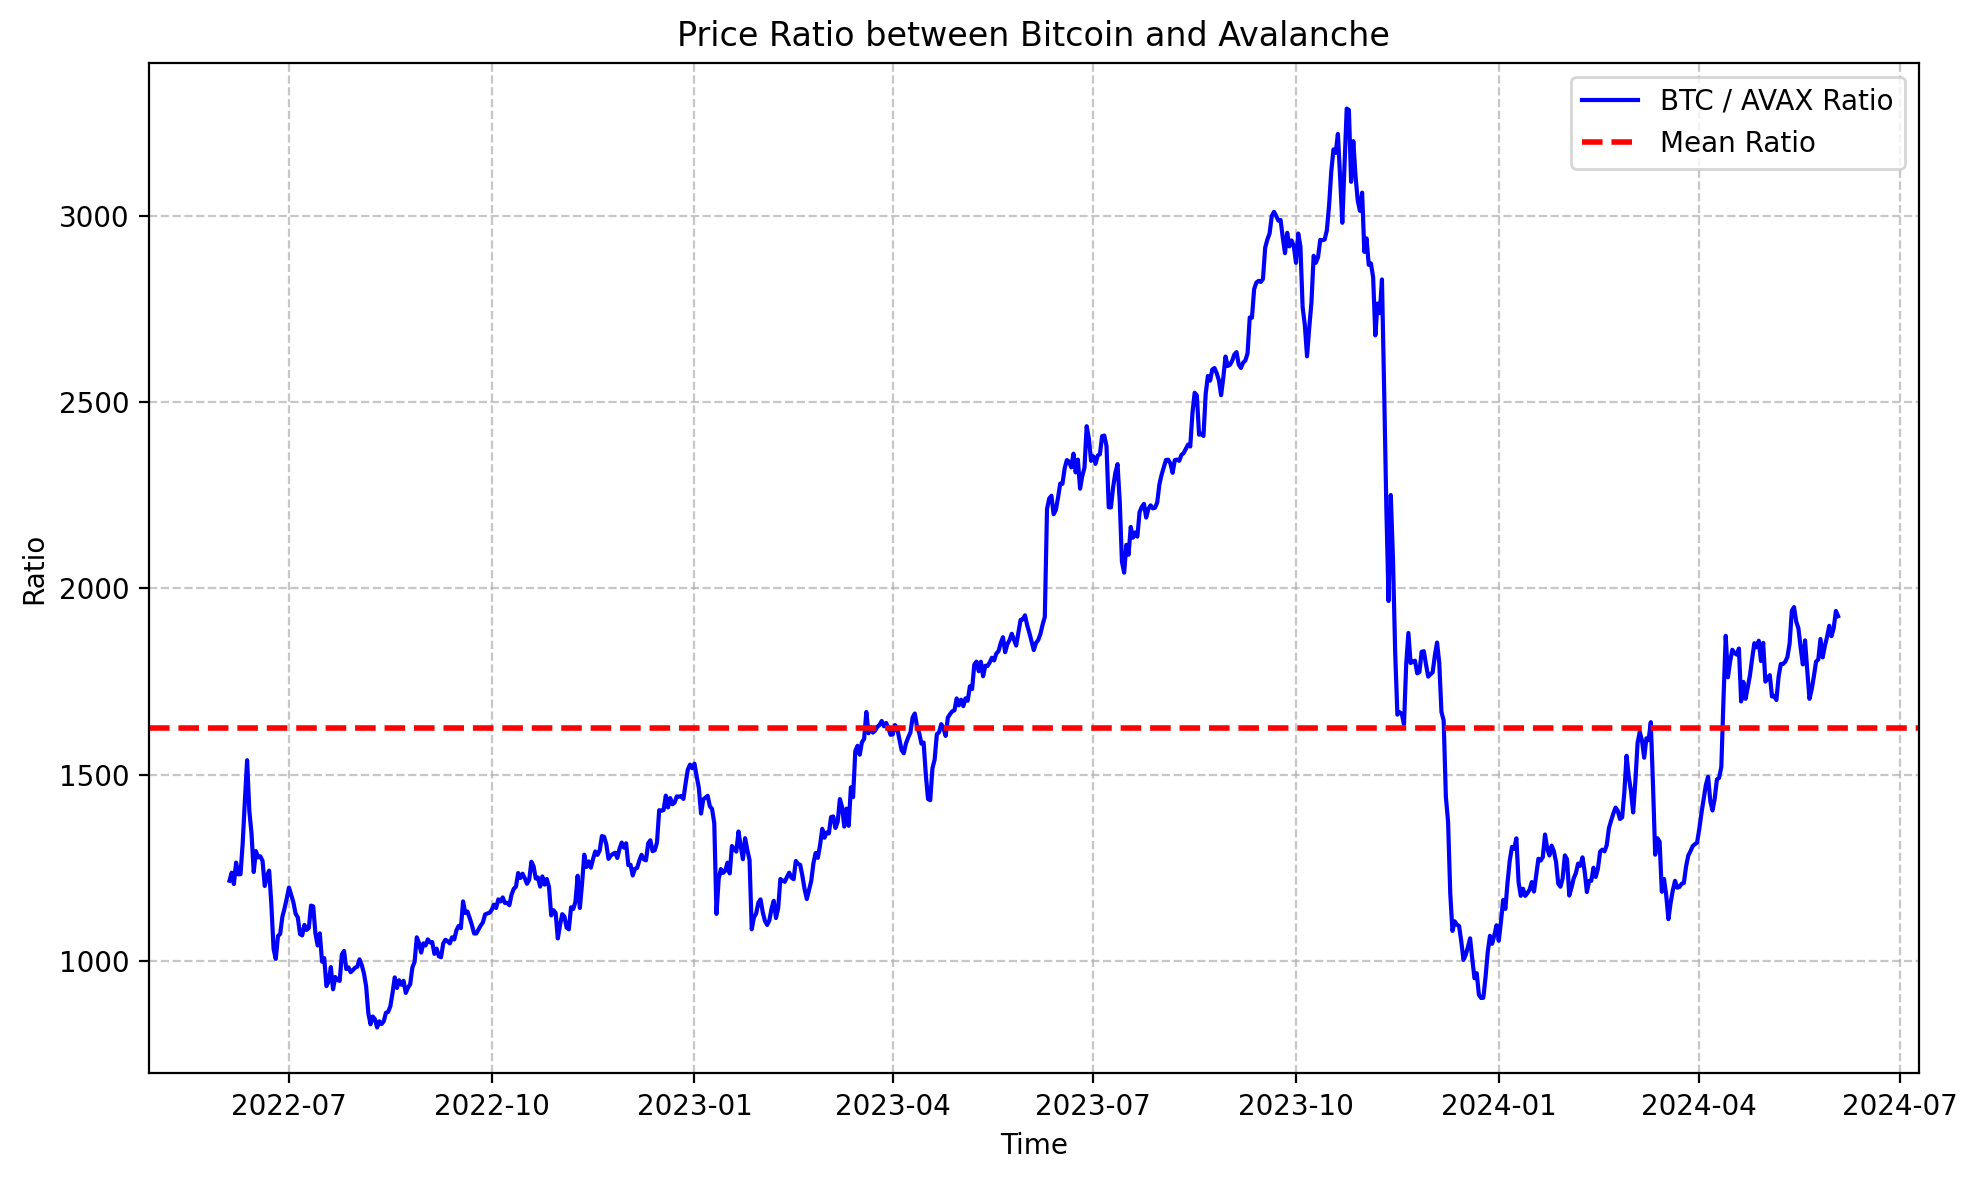

In [21]:
import matplotlib.pyplot as plt

ratio = BTC / AVAX

plt.figure(figsize=(10, 6), dpi=200)
plt.plot(ratio, color='blue', label='BTC / AVAX Ratio')
plt.axhline(ratio.mean(), color='red', linestyle='--', label='Mean Ratio', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.legend()
plt.title("Price Ratio between Bitcoin and Avalanche")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()